In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
seasons={}

for file in os.listdir(r'E:\Violet\2022Fall\bootcamp\datasets\datasets\the_boys'):
    if file[:3] in seasons:
        seasons[file[:3]]+=1
    else:
        seasons[file[:3]]=1
print(seasons)
    

{'s01': 8, 's02': 8, 's03': 8}


In [4]:
def dataframe_generation(directory,season_num):
    season = 's0'+str(season_num)
    for file in os.listdir(directory):
        if file == season+'e01.csv':
            file_all = pd.read_csv('E:\\Violet\\2022Fall\\bootcamp\\datasets\\datasets\\the_boys'+'\\'+file)
        elif file[:3] == season:
            file_i = pd.read_csv('E:\\Violet\\2022Fall\\bootcamp\\datasets\\datasets\\the_boys'+'\\'+file)
            file_all=pd.concat([file_all,file_i])
    file_all=file_all.reset_index()
    return file_all

In [5]:
def get_most_appearance(df):
    return df[df['nconst'] == (df['nconst'].value_counts().to_frame().index[0])]['character'].unique()

In [6]:
def get_on_screen_time_ranking(df):
    s1_dic={}
    for i in range(len(df)):
        show_i = df.loc[i]
        appearance_time=show_i['duration']
        if show_i['nconst'] in s1_dic:
            s1_dic[show_i['nconst']]+=appearance_time
        else:
            s1_dic[show_i['nconst']]=appearance_time
    names=list(s1_dic.keys())
    values=list(s1_dic.values())
    df = pd.DataFrame(list(zip(names, values)),
        columns =['nconst', 'time'])
    a=df.sort_values(by=['time'],ascending=False)
    return a

In [7]:
def get_most_appearance(df):
    return df[df['nconst'] == (df['nconst'].value_counts().to_frame().index[0])]['character'].unique()

In [8]:
def get_character_from_nconst(df,nconst):
    return df[df['nconst']==nconst]['character'].unique()

In [9]:
def find_out_who_died(list_former,list_later):
    for artisit_i in list_former:
        if artisit_i not in list_later:
            print(artisit_i,'is cancelled in later season.')


Season 1

In [10]:
base_directory = r'E:\Violet\2022Fall\bootcamp\datasets\datasets\the_boys' # Please change this to your local directory
season_1_df = dataframe_generation(base_directory,1)
season_1_df['duration'] = season_1_df.apply(lambda x: (x.end - x.start), axis=1) #Add duration
season_1_df.head(5)

,index,nconst,character,start,end,duration
0,0,nm8488639,Benjy,32000,155000,123000
1,1,nm4240263,Jamie,33000,155000,122000
2,2,nm1069800,Queen Maeve,82000,155000,73000
3,3,nm0651456,Desperate Thief #1,100000,155000,55000
4,4,nm1102278,Homelander,130000,155000,25000


In [12]:
season_1_df['nconst'].value_counts().to_frame() # Season 1 ranking by appearance times

,nconst
nm4425051,66
nm0881631,65
nm6150071,44
nm1102278,42
nm3929195,42
...,...
nm4240263,1
nm7836038,1
nm7325131,1
nm6736759,1


In [13]:
print("The person with the most number of appearance occations of season 1:")
get_character_from_nconst(season_1_df,season_1_df['nconst'].value_counts().to_frame().index[0])

The person with the most number of appearance occations of season 1:


array(['Hughie Campbell'], dtype=object)

In [14]:
s1_on_screen_time_ranking = get_on_screen_time_ranking(season_1_df)
s1_on_screen_time_ranking.reset_index()

,index,nconst,time
0,6,nm4425051,12122000
1,21,nm0881631,10565000
2,31,nm6150071,7469000
3,10,nm3929195,6563000
4,51,nm0022306,6264000
...,...,...,...
124,39,nm6844613,21000
125,108,nm0715250,21000
126,19,nm4981734,20000
127,113,nm2854706,11000


In [15]:
print("The person with the most on-screen time of season 1:")
get_character_from_nconst(season_1_df,s1_on_screen_time_ranking.iloc[0]['nconst'])

The person with the most on-screen time of season 1:


array(['Hughie Campbell'], dtype=object)

Season 2

In [16]:
base_directory = r'E:\Violet\2022Fall\bootcamp\datasets\datasets\the_boys'
season_2_df = dataframe_generation(base_directory,2)
season_2_df['duration'] = season_2_df.apply(lambda x: (x.end - x.start), axis=1) #Add duration
season_2_df.head(5)

,index,nconst,character,start,end,duration
0,0,nm3901596,Doug Friedman,183000,371000,188000
1,1,nm0002064,Stan Edgar,199000,371000,172000
2,2,nm0064769,Robert Singer,203000,371000,168000
3,3,nm4877882,Naqib,293000,371000,78000
4,4,nm10800302,Rafiq,297000,371000,74000


In [17]:
season_2_df['nconst'].value_counts().to_frame() # Season 2 ranking by appearance times

,nconst
nm4425051,64
nm0881631,58
nm3929195,57
nm1102278,56
nm0022306,54
...,...
nm1051091,1
nm0625664,1
nm0391738,1
nm8621079,1


In [18]:
print("The person with the most number of appearance occations of season 2:")
get_character_from_nconst(season_2_df,season_2_df['nconst'].value_counts().to_frame().index[0])

The person with the most number of appearance occations of season 2:


array(['Hughie Campbell'], dtype=object)

In [19]:
s2_on_screen_time_ranking = get_on_screen_time_ranking(season_2_df)
s2_on_screen_time_ranking.reset_index()

,index,nconst,time
0,12,nm4425051,8537000
1,36,nm0881631,8273000
2,17,nm0022306,7936000
3,7,nm1102278,7571000
4,9,nm3929195,7569000
...,...,...,...
104,65,nm6596476,26000
105,71,nm5318612,26000
106,104,nm3997201,20000
107,73,nm0640669,10000


In [20]:
print("The person with the most on-screen time of season 2:")
get_character_from_nconst(season_2_df,s2_on_screen_time_ranking.iloc[0]['nconst'])

The person with the most on-screen time of season 2:


array(['Hughie Campbell'], dtype=object)

Season 3

In [21]:
base_directory = r'E:\Violet\2022Fall\bootcamp\datasets\datasets\the_boys'
season_3_df = dataframe_generation(base_directory,3)
season_3_df['duration'] = season_3_df.apply(lambda x: (x.end - x.start), axis=1) #Add duration
season_3_df.head(5)

,index,nconst,character,start,end,duration
0,0,nm1102278,Homelander,126000,230000,104000
1,1,nm1069800,Queen Maeve,194000,230000,36000
2,2,nm3929195,Starlight,195000,230000,35000
3,3,nm1756121,Black Noir,198000,230000,32000
4,4,nm1900772,A-Train,201000,230000,29000


In [22]:
season_3_df['nconst'].value_counts().to_frame() # Season 3 ranking by appearance times

,nconst
nm0881631,130
nm4425051,125
nm3929195,109
nm1102278,103
nm0022306,91
...,...
nm1108188,1
nm8346956,1
nm0312334,1
nm8530399,1


In [23]:
print("The person with the most number of appearance occations of season 3:")
get_character_from_nconst(season_3_df,season_3_df['nconst'].value_counts().to_frame().index[0])

The person with the most number of appearance occations of season 3:


array(['Butcher'], dtype=object)

In [24]:
s3_on_screen_time_ranking = get_on_screen_time_ranking(season_3_df)
s3_on_screen_time_ranking.reset_index()

,index,nconst,time
0,12,nm0881631,8005000
1,9,nm4425051,7285000
2,0,nm1102278,6646000
3,2,nm3929195,6368000
4,30,nm0022306,4974000
...,...,...,...
118,121,nm6364830,15000
119,23,nm3588591,14000
120,106,nm5531364,13000
121,122,nm5045671,10000


In [25]:
print("The person with the most on-screen time of season 3:")
get_character_from_nconst(season_3_df,s3_on_screen_time_ranking.iloc[0]['nconst'])

The person with the most on-screen time of season 3:


array(['Butcher'], dtype=object)

All season

In [26]:
all_season_df = pd.concat([season_1_df,season_2_df,season_3_df]).reset_index()
all_season_df.head(3)

,level_0,index,nconst,character,start,end,duration
0,0,0,nm8488639,Benjy,32000,155000,123000
1,1,1,nm4240263,Jamie,33000,155000,122000
2,2,2,nm1069800,Queen Maeve,82000,155000,73000


In [27]:
all_season_df['nconst'].value_counts().to_frame() # All season ranking by appearance times

,nconst
nm4425051,255
nm0881631,253
nm3929195,208
nm1102278,201
nm0022306,183
...,...
nm1561803,1
nm4484458,1
nm1938954,1
nm2436618,1


In [28]:
print("The person with the most number of appearance occations of all season:")
get_character_from_nconst(all_season_df,all_season_df['nconst'].value_counts().to_frame().index[0])

The person with the most number of appearance occations of all season:


array(['Hughie Campbell', 'Hughie'], dtype=object)

In [29]:
allseason_on_screen_time_ranking = get_on_screen_time_ranking(all_season_df)
allseason_on_screen_time_ranking.reset_index()

,index,nconst,time
0,6,nm4425051,27944000
1,21,nm0881631,26843000
2,10,nm3929195,20500000
3,4,nm1102278,20432000
4,51,nm0022306,19174000
...,...,...,...
293,67,nm0035334,10000
294,176,nm0640669,10000
295,204,nm2555508,10000
296,297,nm5045671,10000


In [30]:
print("The person with the most on-screen time of season 3:")
get_character_from_nconst(all_season_df,allseason_on_screen_time_ranking.iloc[0]['nconst'])

The person with the most on-screen time of season 3:


array(['Hughie Campbell', 'Hughie'], dtype=object)

       nconst      time
6   nm4425051  7.762222
21  nm0881631  7.456389
10  nm3929195  5.694444
4   nm1102278  5.675556
51  nm0022306  5.326111


<AxesSubplot:title={'center':'s03 time ranking (time in hours)'}, xlabel='nconst'>

<Figure size 432x288 with 0 Axes>

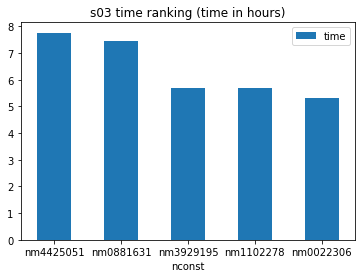

In [31]:
allseason_on_screen_time_ranking['time']=allseason_on_screen_time_ranking['time']/1000/60/60 # From miliseconds to hours
a=allseason_on_screen_time_ranking.sort_values(by=['time'],ascending=False).head(5)
print(a)
fig = plt.figure()
a.plot.bar(x='nconst', y='time', rot=0,title='s03 time ranking (time in hours)')

Examine the change of top 10 people

In [32]:
def get_top10_by_appearance_num(df,all_season_df):
    s1_a_num = df['nconst'].value_counts().to_frame()
    s1_a_num['appearance'] = s1_a_num['nconst']
    s1_a_num['nconst'] = list(s1_a_num.index)
    s1_a_num.reset_index()
    s1_a_num['character'] = s1_a_num['nconst'].apply(lambda x: get_character_from_nconst(all_season_df,x)[0])
    s1_num_lis=list(s1_a_num.head(10)['character'])
    return s1_num_lis

In [33]:
def compare_two_top10_lists(former_top10,later_top_10):
    for i in range(10):
        if later_top_10[i] in former_top10:
            if later_top_10[i] == former_top10[i]:
                print("Number",i+1,"is",later_top_10[i],". Stays the same")
            else:
                print("Number",i+1,"is",later_top_10[i],". He/she is number",former_top10.index(later_top_10[i])+1,"in former season")
                if former_top10.index(later_top_10[i]) < i:
                    print("Decreased")
                else:
                    print("Increased")
        else:
            print("Number",i+1,"is",later_top_10[i],". New comer")
    return 0

In [34]:
print("Season 1 top 10 by appearance number in nconst")
s1_a_num = get_top10_by_appearance_num(season_1_df,all_season_df)
s1_a_num

Season 1 top 10 by appearance number in nconst


['Hughie Campbell',
 'Billy Butcher',
 'Frenchie',
 'Homelander',
 'Starlight',
 'Mother’s Milk',
 'Madelyn Stillwell',
 'A-Train',
 'The Deep',
 'Queen Maeve']

In [35]:
print("Season 2 top 10 by appearance number in nconst")
s2_a_num = get_top10_by_appearance_num(season_2_df,all_season_df)
s2_a_num

Season 2 top 10 by appearance number in nconst


['Hughie Campbell',
 'Billy Butcher',
 'Starlight',
 'Homelander',
 'Mother’s Milk',
 'Frenchie',
 'The Female',
 'Stormfront',
 'Queen Maeve',
 'Ashley Barrett']

In [36]:
print("Season 3 top 10 by appearance number in nconst")
s3_a_num = get_top10_by_appearance_num(season_3_df,all_season_df)
s3_a_num

Season 3 top 10 by appearance number in nconst


['Billy Butcher',
 'Hughie Campbell',
 'Starlight',
 'Homelander',
 'Mother’s Milk',
 'Soldier Boy',
 'The Female',
 'Frenchie',
 'Ashley Barrett',
 'A-Train']

In [39]:
print("On season 2")
compare_two_top10_lists(former_top10=s1_a_num,later_top_10=s2_a_num)

On season 2
Number 1 is Hughie Campbell . Stays the same
Number 2 is Billy Butcher . Stays the same
Number 3 is Starlight . He/she is number 5 in former season
Increased
Number 4 is Homelander . Stays the same
Number 5 is Mother’s Milk . He/she is number 6 in former season
Increased
Number 6 is Frenchie . He/she is number 3 in former season
Decreased
Number 7 is The Female . New comer
Number 8 is Stormfront . New comer
Number 9 is Queen Maeve . He/she is number 10 in former season
Increased
Number 10 is Ashley Barrett . New comer


0

In [38]:
print("On season 3")
compare_two_top10_lists(compare_two_top10_lists(former_top10=s2_a_num,later_top_10=s3_a_num))

On season 3
Number 1 is Billy Butcher . He/she is number 2 in former season
Increased
Number 2 is Hughie Campbell . He/she is number 1 in former season
Decreased
Number 3 is Starlight . Stays the same
Number 4 is Homelander . Stays the same
Number 5 is Mother’s Milk . Stays the same
Number 6 is Soldier Boy . New comer
Number 7 is The Female . Stays the same
Number 8 is Frenchie . He/she is number 6 in former season
Decreased
Number 9 is Ashley Barrett . He/she is number 10 in former season
Increased
Number 10 is A-Train . New comer


TypeError: compare_two_top10_lists() missing 1 required positional argument: 'later_top_10'

In [44]:
print("In the top ten list")
print("Comparing season 1 with season 2")

find_out_who_died(s1_a_num,s2_a_num)

In the top ten list
Comparing season 1 with season 2
Madelyn Stillwell is cancelled in later season.
A-Train is cancelled in later season.
The Deep is cancelled in later season.


In [45]:
print("In the top ten list")
print("Comparing season 2 with season 3")

find_out_who_died(s2_a_num,s3_a_num)

In the top ten list
Comparing season 2 with season 3
Stormfront is cancelled in later season.
Queen Maeve is cancelled in later season.


Note the above comparision across top 10 list in seasons,
the top ten is calculated by ranking appearance times instead of duration.
In the following, we repeat exactly the same comparisions, but with ranking by appearance durations.

In [60]:
s1_duration_top10 = list(s1_on_screen_time_ranking.reset_index().iloc[:10]['nconst'].apply(lambda x: get_character_from_nconst(season_1_df,x)[0]))
s2_duration_top10 = list(s2_on_screen_time_ranking.reset_index().iloc[:10]['nconst'].apply(lambda x: get_character_from_nconst(season_2_df,x)[0]))
s3_duration_top10 = list(s3_on_screen_time_ranking.reset_index().iloc[:10]['nconst'].apply(lambda x: get_character_from_nconst(season_3_df,x)[0]))

In [61]:
print("On season 2")
compare_two_top10_lists(former_top10=s1_duration_top10,later_top_10=s2_duration_top10)

On season 2
Number 1 is Hughie Campbell . Stays the same
Number 2 is Billy Butcher . Stays the same
Number 3 is Mother's Milk . New comer
Number 4 is Homelander . He/she is number 6 in former season
Increased
Number 5 is Starlight . He/she is number 4 in former season
Decreased
Number 6 is Frenchie . He/she is number 3 in former season
Decreased
Number 7 is Kimiko Miyashiro . New comer
Number 8 is Stormfront . New comer
Number 9 is Queen Maeve . Stays the same
Number 10 is Ryan . New comer


0

In [62]:
print("On season 3")
compare_two_top10_lists(compare_two_top10_lists(former_top10=s2_duration_top10,later_top_10=s3_duration_top10))

On season 3
Number 1 is Butcher . New comer
Number 2 is Hughie . New comer
Number 3 is Homelander . He/she is number 4 in former season
Increased
Number 4 is Starlight . He/she is number 5 in former season
Increased
Number 5 is Mother's Milk . He/she is number 3 in former season
Decreased
Number 6 is Frenchie . Stays the same
Number 7 is Kimiko . New comer
Number 8 is Soldier Boy . New comer
Number 9 is Ashley Barrett . New comer
Number 10 is A-Train . New comer


TypeError: compare_two_top10_lists() missing 1 required positional argument: 'later_top_10'

In [63]:
print("In the top ten list")
print("Comparing season 1 with season 2")

find_out_who_died(s1_duration_top10,s2_duration_top10)

In the top ten list
Comparing season 1 with season 2
Mother’s Milk is cancelled in later season.
Madelyn Stillwell is cancelled in later season.
A-Train is cancelled in later season.
The Female is cancelled in later season.


In [64]:
print("In the top ten list")
print("Comparing season 2 with season 3")

find_out_who_died(s2_duration_top10,s3_duration_top10)

In the top ten list
Comparing season 2 with season 3
Hughie Campbell is cancelled in later season.
Billy Butcher is cancelled in later season.
Kimiko Miyashiro is cancelled in later season.
Stormfront is cancelled in later season.
Queen Maeve is cancelled in later season.
Ryan is cancelled in later season.
